# 1. Dataset analysis, cleaning and preprocessing

### Highlights of this Notebook:

<p style="font-size:14px">
- Quick dataset outlook (missing, duplicated, etc); <br>
- Analysis of each feature to understand the dataset; <br>
- Irrelevant (duplicated) features dropped; <br>
- Mode and mean used to fill the missing info; <br>
- Numerical features Scaled (Robust) and Categorical encoded; <br>
- Outliers handled with Statistical dispersion: 3 x Interquartile Range (Q3 - Q1); </p>

🎯 The goal of this Notebook is to download and make any edition needed

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Path
import os

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

## 📝 DICTIONARY - Definition & Fer-Greg Analysis

👀 _ think about correcting for all dataset i/o feature per feature

🔴 ID: Represents a unique identification of an entry **>>> Drop it - irrelevant <<<**

🟢 Customer_ID: Represents a unique identification of a person **>>> Keep it <<<**

🟢 Month: Represents the month of the year **>>> Keep it - month from Januray to August, encode it <<<**

🔴 Name: Represents the name of a person **>>> Drop it - same as Customer_ID <<<**

🟢 Age: Represents the age of the person **>>> Keep it - clean it <<<**

🔴 SSN: Represents the social security number of a person **>>> Drop it - same as Customer_ID <<<**

🟢 Occupation: Represents the occupation of the person **>>> Keep it - clean it, encode it <<<**

🟢 Annual_Income: Represents the annual income of the person **>>> Keep it - clean it <<<**

🔴 Monthly_Inhand_Salary: Represents the monthly base salary of a person **>>> Drop it - same as Annual_Income <<<**

🟢 Num_Bank_Accounts: Represents the number of bank accounts a person holds **>>> Keep it - clean it (outliers) <<<**

🟢 Num_Credit_Card: Represents the number of other credit cards held by a person **>>> Keep it - clean it (outliers) <<<**

🟢 Interest_Rate: Represents the interest rate on credit card **>>> Keep it - clean it (outliers) <<<**

🟢 Num_of_Loan: Represents the number of loans taken from the bank **>>> Keep it - clean it (outliers) <<<**

🔴 Type_of_Loan: Represents the types of loan taken by a person **>>> Drop it - same as Annual_Income <<<**

🟢 Delay_from_due_date: Represents the average number of days delayed from the payment date **>>> Keep it - clean it, check 
values <0 <<<**

🟢 Num_of_Delayed_Payment: Represents the average number of payments delayed by a person **>>> Keep it - clean it <<<**

🟢 Changed_Credit_Limit: Represents the percentage change in credit card limit **>>> Keep it - consider a percentage change with respect to a baseline <<<**

🟢 Num_Credit_Inquiries: Represents the number of credit card inquiries **>>> Keep it - clean it <<<**

🟢 Credit_Mix: Represents the classification of the mix of credits **>>> Keep it - clean it, very important feature to show credit diversity <<<**

🟢 Outstanding_Debt: Represents the remaining debt to be paid (in USD) **>>> Keep it - clean it <<<**

🟢 Credit_Utilization_Ratio: Represents the utilization ratio of credit card **>>> Keep it - focus on correlation investigation <<<**

🟢 Credit_History_Age: Represents the age of credit history of the person **>>> Keep it - clean it <<<**

🟢 Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person **>>> Keep it - clean it, consider that NM means No Minimum Value: 'No' is good <<<**

🟢 Total_EMI_per_month: Represents the monthly EMI payments (in USD) **>>> Keep it - clean it, check 0 means customer does not owe anything <<<**

🟢 Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD) **>>> Keep it - clean it <<<**

🟢 Payment_Behaviour: Represents the payment behavior of the customer (in USD) **>>> Keep it - clean it, encode it, important feature <<<**

🟢 Monthly_Balance: Represents the monthly balance amount of the customer (in USD) **>>> Keep it - clean it <<<**

🟢 Credit_Score: Represents the bracket of credit score (Poor, Standard, Good) **>>> Target <<<**

In [2]:
url = '/home/fernando_cir/code/monrosegregory/credit_score/raw_data/train.csv'

In [3]:
df = pd.read_csv(url)
df

/tmp/ipykernel_115326/2348912207.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## Creating a copy and keeping the original df isolated for future checkings

In [4]:
data = df.copy()

In [5]:
data.tail(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [6]:
print(data.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [7]:
data.shape

(100000, 28)

## Drop irrelevant features

In [8]:
data = data.drop(["ID", "Name", "SSN", "Monthly_Inhand_Salary", "Type_of_Loan"], axis=1)

In [9]:
data.shape

(100000, 23)

In [10]:
pd.set_option('display.max_columns', None)
#configurating pandas so can show to me all the columns

In [11]:
data.head(3)

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [12]:
data.dtypes

Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

## Check if there is any duplicated

In [14]:
print(data.duplicated().sum())

0


## Check missing values

In [15]:
len(data)

100000

In [16]:
data.isnull().sum().sort_values(ascending=False) / len(data)

Credit_History_Age          0.09030
Num_of_Delayed_Payment      0.07002
Amount_invested_monthly     0.04479
Num_Credit_Inquiries        0.01965
Monthly_Balance             0.01200
Month                       0.00000
Customer_ID                 0.00000
Num_Credit_Card             0.00000
Num_Bank_Accounts           0.00000
Annual_Income               0.00000
Occupation                  0.00000
Age                         0.00000
Delay_from_due_date         0.00000
Num_of_Loan                 0.00000
Interest_Rate               0.00000
Outstanding_Debt            0.00000
Credit_Mix                  0.00000
Changed_Credit_Limit        0.00000
Credit_Utilization_Ratio    0.00000
Total_EMI_per_month         0.00000
Payment_of_Min_Amount       0.00000
Payment_Behaviour           0.00000
Credit_Score                0.00000
dtype: float64

In [17]:
data.describe().T
#only numerical

,count,mean,std,min,25%,50%,75%,max
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.0,3.000000,6.000000,7.000000,1798.0
Num_Credit_Card,100000.0,22.474430,129.057410,0.0,4.000000,5.000000,7.000000,1499.0
Interest_Rate,100000.0,72.466040,466.422621,1.0,8.000000,13.000000,20.000000,5797.0
Delay_from_due_date,100000.0,21.068780,14.860104,-5.0,10.000000,18.000000,28.000000,67.0
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.0,3.000000,6.000000,9.000000,2597.0
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.0,28.052567,32.305784,36.496663,50.0
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.0,30.306660,69.249473,161.224249,82331.0


In [18]:
data.describe(include=['object']).T

,count,unique,top,freq
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Age,100000,1788,38,2833
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,20867.67,16
Num_of_Loan,100000,434,3,14386
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,13178,1360.45,24


## Cleaning Global: special characteres (useless)

In [19]:
# Replace underscores with an empty string (remove them)
data = data.replace('_', '', regex=True)

In [20]:
# Replace empty strings with NaN
data.replace('', np.nan, inplace=True)

In [21]:
# Identify rows with empty values
rows_with_empty_values = data[data.eq('').any(axis=1)]

# Fill empty values with NaN in selected rows
data.loc[rows_with_empty_values.index] = data.loc[rows_with_empty_values.index].replace('', np.nan)

## Clustering Categorical and Numerical features

In [22]:
list_cat = ["Customer_ID", "Month", "Occupation", "Credit_Mix", "Credit_History_Age", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]
list_num = ["Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

In [23]:
list_cat

['Customer_ID',
 'Month',
 'Occupation',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [24]:
list_num

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

## Cleaning CATEGORICAL Features (8 total)

### Strategy: retrieve info by "Customer_ID"

#### (1/8) Customer_ID: not necessary

In [25]:
print(data["Customer_ID"])

0         CUS0xd40
1         CUS0xd40
2         CUS0xd40
3         CUS0xd40
4         CUS0xd40
           ...    
99995    CUS0x942c
99996    CUS0x942c
99997    CUS0x942c
99998    CUS0x942c
99999    CUS0x942c
Name: Customer_ID, Length: 100000, dtype: object


#### (2/8) Month: Encode

In [26]:
data["Month"].value_counts(ascending=False)

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [27]:
data["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [28]:
dic = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
    }

In [29]:
data["Month"] = data["Month"].map(dic)

In [30]:
data["Month"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [31]:
months_in_year = 12

data["sin_Month"] = np.sin(2*np.pi*data[["Month"]] / months_in_year)
data["cos_Month"] = np.cos(2*np.pi*data[["Month"]] / months_in_year)

In [32]:
data = data.drop(columns="Month")

#### (3/8) Occupation

In [33]:
data["Occupation"].value_counts(ascending=False) / len(data["Occupation"])

Occupation
Lawyer          0.06575
Architect       0.06355
Engineer        0.06350
Scientist       0.06299
Mechanic        0.06291
Accountant      0.06271
Developer       0.06235
MediaManager    0.06232
Teacher         0.06215
Entrepreneur    0.06174
Doctor          0.06087
Journalist      0.06085
Manager         0.05973
Musician        0.05911
Writer          0.05885
Name: count, dtype: float64

In [34]:
len(data["Occupation"])

100000

In [35]:
data["Occupation"].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'MediaManager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [36]:
data.head(12)

,Customer_ID,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,sin_Month,cos_Month
0,CUS0xd40,23,Scientist,19114.12,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good,5.000000e-01,8.660254e-01
1,CUS0xd40,23,Scientist,19114.12,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,Good,8.660254e-01,5.000000e-01
2,CUS0xd40,-500,Scientist,19114.12,3,4,3,4,3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good,1.000000e+00,6.123234e-17
3,CUS0xd40,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good,8.660254e-01,-5.000000e-01
4,CUS0xd40,23,Scientist,19114.12,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good,5.000000e-01,-8.660254e-01
5,CUS0xd40,23,Scientist,19114.12,3,4,3,4,8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,1.224647e-16,-1.000000e+00
6,CUS0xd40,23,Scientist,19114.12,3,4,3,4,3,8,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,Good,-5.000000e-01,-8.660254e-01
7,CUS0xd40,23,Scientist,19114.12,3,4,3,4,3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,HighspentMediumvaluepayments,358.12416760938714,Standard,-8.660254e-01,-5.000000e-01
8,CUS0x21b1,28,NaN,34847.84,2,4,6,1,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,Standard,5.000000e-01,8.660254e-01
9,CUS0x21b1,28,Teacher,34847.84,2,4,6,1,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,HighspentLargevaluepayments,484.5912142650067,Good,8.660254e-01,5.000000e-01


In [37]:
# Calculate the mode for each group
mode_by_Customer_ID = data.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Occupation' with the mode for each group
data['Occupation'] = data['Occupation'].fillna(mode_by_Customer_ID)

# Display the count of missing values
print(data['Occupation'].isna().sum())

0


In [38]:
#Strategy: retrieve info by "Customer_ID" - if that doesn't work: distribute with mode

#### (4/8) Credit_Mix

In [39]:
data["Credit_Mix"].value_counts(ascending=False)

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

In [40]:
# Calculate the mode for each group
mode_by_Customer_ID = data.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_Mix' with the mode for each group
data['Credit_Mix'] = data['Credit_Mix'].fillna(mode_by_Customer_ID)

# Display the count of missing values
print(data['Credit_Mix'].isna().sum())

0


In [41]:
data["Credit_Mix"].value_counts(ascending=False)

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [42]:
#Strategy: retrieve info by "Customer_ID" - if that doesn't work: distribute with mode

#### (5/8) Credit_History_Age

In [43]:
data["Credit_History_Age"].value_counts(ascending=False)

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [44]:
data["Credit_History_Age"].unique

<bound method Series.unique of 0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object>

In [45]:
# Extract years and months from 'Credit_History_Age' column
data['Credit_History_Years'] = data['Credit_History_Age'].str.extract(r'(\d+)\s*Years?').astype(float)
data['Credit_History_Months'] = data['Credit_History_Age'].str.extract(r'(\d+)\s*Months?').astype(float)

# Handle missing or NaN values
data['Credit_History_Years'] = data['Credit_History_Years'].fillna(0)
data['Credit_History_Months'] = data['Credit_History_Months'].fillna(0)

# Convert years to months and add with months to get total months
data['Credit_History_Age_Months'] = (data['Credit_History_Years'] * 12 + data['Credit_History_Months']).astype(int)

# Drop the intermediate columns used for calculation (optional, if you no longer need them)
data.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

data.loc[data['Credit_History_Age_Months']<0, 'Credit_History_Age_Months'] = 0  # Replacing less than zero with zero

# Display counts of unique values in 'Credit_History_Age_Months'
value_counts = data['Credit_History_Age_Months'].value_counts()

# Replace 0 with NaN in the 'Credit_History_Age_Months' column
data['Credit_History_Age_Months'] = data['Credit_History_Age_Months'].replace(0, np.nan)

In [46]:
# Group by 'Customer_ID' and calculate the mean for 'Credit_History_Age_Months' within each group
mean_by_Customer_ID = data.groupby('Customer_ID')['Credit_History_Age_Months'].transform(lambda x: x.mean())

# Fill NaN values in 'Credit_History_Age' with the mean for each group
data['Credit_History_Age_Months'] = data['Credit_History_Age_Months'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(data['Credit_History_Age_Months'].isna().sum())

0


In [47]:
data.drop(columns=['Credit_History_Age'], inplace=True)

In [48]:
#Strategy: transform and encode regularly (don't need sin and cos because it is only the aging, not when)

#### (6/8) Payment_of_Min_Amount

In [49]:
data["Payment_of_Min_Amount"].value_counts(ascending=False)

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [50]:
#Strategy: nothing

#### (7/8) Payment_Behaviour

In [51]:
data["Payment_Behaviour"].value_counts(ascending=False)

Payment_Behaviour
LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
!@9#%8                           7600
Name: count, dtype: int64

In [52]:
# Replace '!@9#%8' with NaN
data['Payment_Behaviour'].replace('!@9#%8', np.nan, inplace=True)

/tmp/ipykernel_115326/1037669181.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Payment_Behaviour'].replace('!@9#%8', np.nan, inplace=True)


In [53]:
# Calculate the mode for each group
mode_by_Customer_ID = data.groupby('Customer_ID')['Payment_Behaviour'].transform(
    lambda x: x.mode()[0])

# Fill NaN values in 'Occupation' with the mode for each group
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(mode_by_Customer_ID)

# Display the count of missing values
print(data['Payment_Behaviour'].isna().sum())

0


In [54]:
#Strategy: retrieve/confirm info by "Customer_ID" if that doesn't work: mode

#### (8/8) Credit_score: no need because it is y for baseline model

## Cleaning NUMERICAL Features

In [55]:
# remove negatives and remove "_"

In [56]:
list_num

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

#### (1/15) Age:

In [57]:
#data["Age"].value_counts(ascending=False)
data["Age"].value_counts(ascending=False).unique()

array([2994, 2968, 2955, 2945, 2884, 2868, 2866, 2861, 2859, 2846, 2837,
       2824, 2793, 2785, 2744, 2742, 2735, 2734, 2727, 2716, 2714, 2654,
       2642, 2609, 2577, 2543, 2385, 1621, 1574, 1502, 1455, 1385, 1375,
       1366, 1356, 1354, 1311, 1291, 1273, 1227, 1175,  886,  362,    4,
          3,    2,    1])

In [58]:
print(data["Age"].unique())

['23' '-500' '28' ... '4808' '2263' '1342']


In [59]:
# Convert Age column to numeric, coercing errors to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Replace values > 100 or < 0 with NaN
data.loc[(data['Age'] > 100) | (data['Age'] < 0), 'Age'] = np.nan

In [60]:
# Calculate the mode for each group
mode_by_Customer_ID = data.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Age' with the mode for each group
data['Age'] = data['Age'].fillna(mode_by_Customer_ID)

data['Age'] = data['Age'].abs()

# Display the count of missing values
print(data['Age'].isna().sum())

0


In [61]:
# Strategy: retrieve/confirm info by "Customer_ID" if that doesn't work: remove negative and "_"
# como ele tratou valores ruins: colocou nan
# idade: >100 e <0

In [62]:
list_num

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

#### (2/15) Annual_Income:

In [63]:
data["Annual_Income"].value_counts(ascending=False)

Annual_Income
17273.83      16
109945.32     16
22434.16      16
17816.75      16
9141.63       16
              ..
17353657.0     1
22063213.0     1
2093173.0      1
18996379.0     1
11845938.0     1
Name: count, Length: 13487, dtype: int64

In [64]:
# df['Annual_Income'] = df['Annual_Income'].astype(float)

# data['Annual_Income'] = data['Annual_Income'].abs()

In [65]:
#Strategy: remove negative and "_", scale?

#### (3/15) Num_Bank_Accounts:

In [66]:
data["Num_Bank_Accounts"].value_counts(ascending=False)

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
665         1
1388        1
1429        1
1588        1
1777        1
Name: count, Length: 943, dtype: int64

In [67]:
data["Num_Bank_Accounts"].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

<Axes: xlabel='Num_Bank_Accounts', ylabel='Count'>

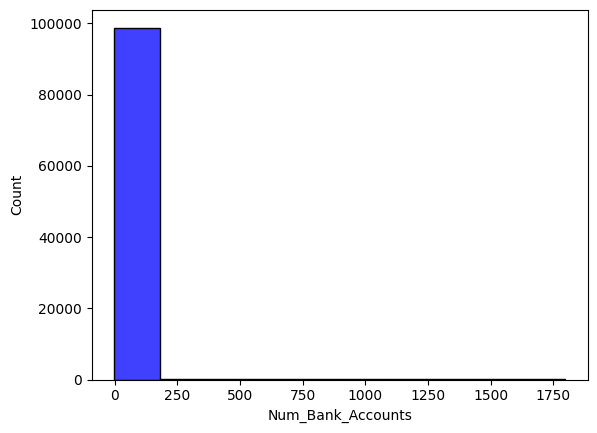

In [68]:
#sns.histplot(data["Num_Bank_Accounts"])

#sns.histplot(data["Num_Bank_Accounts"], kde=True, stat="density", bins=30, color='blue')

sns.histplot(data["Num_Bank_Accounts"], kde=False, bins=10, color='blue')

In [69]:
# Replacing account balances less than zero with zero

data.loc[data['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [70]:
data['Num_Bank_Accounts'] = pd.to_numeric(data['Num_Bank_Accounts'], errors='coerce')

In [71]:
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].astype(float)
data['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091490
std         117.404803
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

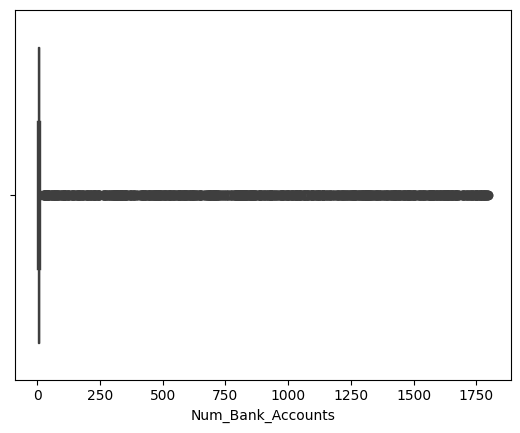

In [72]:
sns.boxplot(data= data, x = data['Num_Bank_Accounts']);

In [73]:
#Strategy:  max bank account = 10

#### (4/15) Num_Credit_Card:

In [74]:
data["Num_Credit_Card"].value_counts(ascending=False)

Num_Credit_Card
5      18459
7      16615
6      16559
4      14030
3      13277
       ...  
551        1
426        1
784        1
673        1
599        1
Name: count, Length: 1179, dtype: int64

In [75]:
data['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

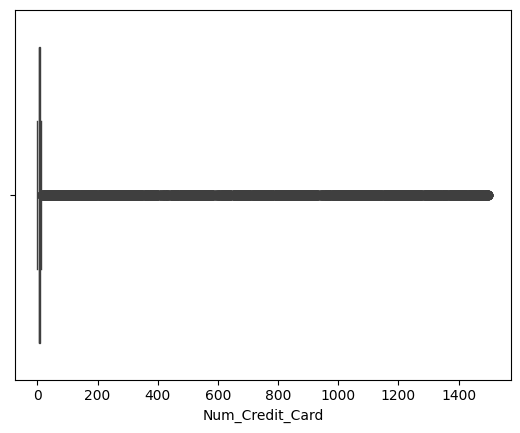

In [76]:
sns.boxplot(data=data, x=data['Num_Credit_Card']);

In [77]:
#Strategy:  max credit card = 10

#### (5/15) Interest_Rate:

In [78]:
data["Interest_Rate"].value_counts(ascending=False)

Interest_Rate
8       5012
5       4979
6       4721
10      4540
12      4540
        ... 
3782       1
3849       1
2206       1
4828       1
1683       1
Name: count, Length: 1750, dtype: int64

In [79]:
data['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

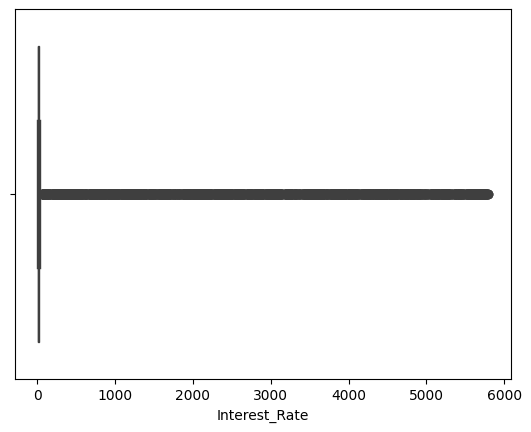

In [80]:
sns.boxplot(data=data, x = data['Interest_Rate']);

In [81]:
#Strategy:  max Interest_Rate = 50%

#### (6/15) Num_of_Loan:

In [82]:
data["Num_of_Loan"].value_counts(ascending=False)

Num_of_Loan
3       15104
2       15032
4       14743
0       10930
1       10606
        ...  
841         1
1015        1
198         1
719         1
405         1
Name: count, Length: 414, dtype: int64

In [83]:
data['Num_of_Loan'].describe()

count     100000
unique       414
top            3
freq       15104
Name: Num_of_Loan, dtype: object

In [84]:
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')

data.loc[data['Num_of_Loan']<0, 'Num_of_Loan'] = 0  # Replacing less than zero with zero

In [85]:
data['Num_of_Loan'].describe()

count    100000.000000
mean          6.885960
std          59.150621
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

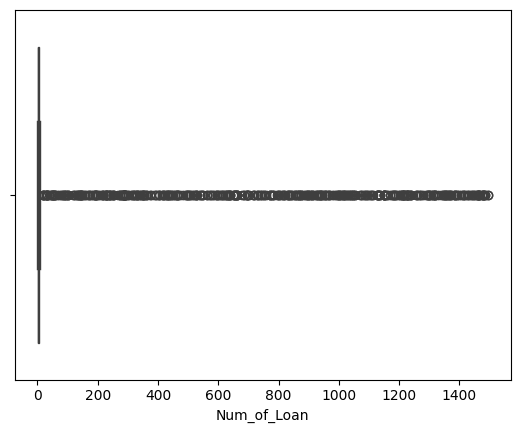

In [86]:
sns.boxplot(data=data, x = data['Num_of_Loan']);

In [87]:
#Strategy:  max num_loan = 10

#### (7/15) Delay_from_due_date:

In [88]:
data["Delay_from_due_date"].value_counts(ascending=False)

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

In [89]:
data["Delay_from_due_date"].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [90]:
data.loc[data['Delay_from_due_date']<0, 'Delay_from_due_date'] = 0  # Replacing less than zero with zero

In [91]:
data["Delay_from_due_date"].describe()

count    100000.000000
mean         21.081910
std          14.840204
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

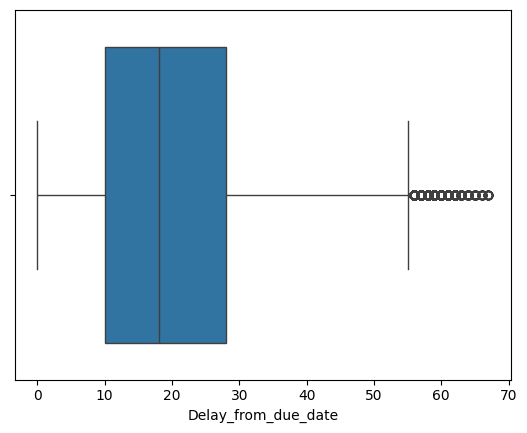

In [92]:
sns.boxplot(data= data, x = data['Delay_from_due_date']);

In [93]:
#Strategy:  eliminate negatives and "_"

#### (8/15) Num_of_Delayed_Payment:

In [94]:
data["Num_of_Delayed_Payment"].value_counts(ascending=False)

Num_of_Delayed_Payment
19      5481
17      5412
16      5312
10      5309
15      5237
        ... 
4134       1
1530       1
1502       1
4075       1
1869       1
Name: count, Length: 711, dtype: int64

In [95]:
data["Num_of_Delayed_Payment"].dtype

dtype('O')

In [96]:
# Convert Non-Numeric Values to NaN
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Num_of_Delayed_Payment' within each group
mean_by_Customer_ID = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mean())

# Fill NaN values in 'Num_of_Delayed_Payment' with the mean for each group
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(mean_by_Customer_ID)

# Converting potential negatives values in absolute
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].abs()

# Display the count of missing values
print(data['Num_of_Delayed_Payment'].isna().sum())

0


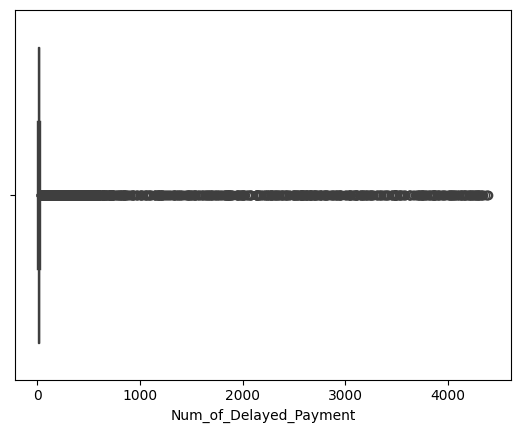

In [97]:
sns.boxplot(data= data, x = data['Num_of_Delayed_Payment']);

In [98]:
#Strategy: missing mean

#### (9/15) Changed_Credit_Limit:

In [99]:
data["Changed_Credit_Limit"].value_counts(ascending=False)

Changed_Credit_Limit
8.22                  133
11.5                  127
11.32                 126
10.06                 121
7.35                  121
                     ... 
3.1900000000000004      1
0.8199999999999998      1
30.91                   1
-6.2                    1
-3.05                   1
Name: count, Length: 4383, dtype: int64

In [100]:
# Convert Non-Numeric Values to NaN
data['Changed_Credit_Limit'] = pd.to_numeric(data['Changed_Credit_Limit'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Changed_Credit_Limit' within each group
mean_by_Customer_ID = data.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.mean())

# Fill NaN values in 'Changed_Credit_Limit' with the mean for each group
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(data['Changed_Credit_Limit'].isna().sum())

0


In [101]:
#Strategy: retrieve/confirm info by "Customer_ID" and if that doesn't work: use mean.

#### (10/15) Num_Credit_Inquiries:

In [102]:
data["Num_Credit_Inquiries"].value_counts(ascending=False)

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
719.0         1
2239.0        1
2001.0        1
1953.0        1
2473.0        1
Name: count, Length: 1223, dtype: int64

In [103]:
# Convert Non-Numeric Values to NaN
data['Num_Credit_Inquiries'] = pd.to_numeric(data['Num_Credit_Inquiries'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Num_Credit_Inquiries' within each group
mean_by_Customer_ID = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mean())

# Fill NaN values in 'Num_Credit_Inquiries' with the mean for each group
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(mean_by_Customer_ID)

# Converting potential negatives values in absolute
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].abs()

# Display the count of missing values
print(data['Num_Credit_Inquiries'].isna().sum())

0


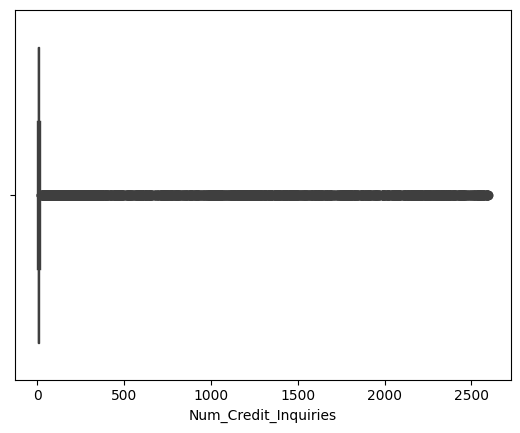

In [104]:
sns.boxplot(data=data, x = data['Num_Credit_Inquiries']);

In [105]:
#Strategy: max = 10

#### (11/15) Outstanding_Debt:

In [106]:
data["Outstanding_Debt"].value_counts(ascending=False)

Outstanding_Debt
1360.45    24
460.46     24
1109.03    24
1151.7     24
834.87     16
           ..
98.61       8
2614.48     8
1256.67     8
1048.87     8
496.55      8
Name: count, Length: 12203, dtype: int64

In [107]:
data['Outstanding_Debt'].describe()

count      100000
unique      12203
top       1360.45
freq           24
Name: Outstanding_Debt, dtype: object

In [108]:
data['Outstanding_Debt'] = pd.to_numeric(data['Outstanding_Debt'], errors='coerce')

data['Outstanding_Debt'] = data['Outstanding_Debt'].abs()

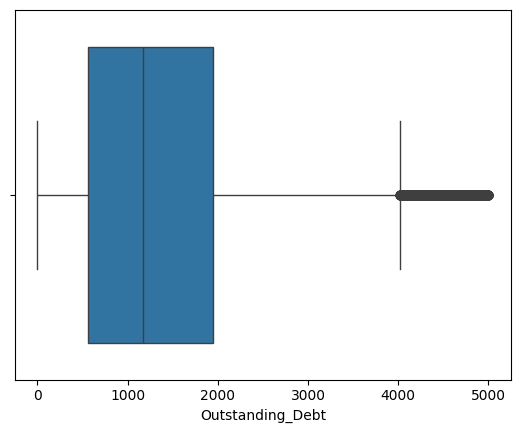

In [109]:
sns.boxplot(data=data, x = data['Outstanding_Debt']);

In [110]:
#Strategy: remove "_" and SCALE

#### (12/15) Credit_Utilization_Ratio:

In [111]:
data["Credit_Utilization_Ratio"].value_counts(ascending=False)

Credit_Utilization_Ratio
27.289440    1
33.494867    1
31.738359    1
30.625298    1
23.140640    1
            ..
31.377862    1
24.797347    1
27.262259    1
22.537593    1
23.933795    1
Name: count, Length: 100000, dtype: int64

In [112]:
data['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [113]:
data['Credit_Utilization_Ratio'] = pd.to_numeric(data['Credit_Utilization_Ratio'], errors='coerce')


data.loc[data['Credit_Utilization_Ratio']<0, 'Credit_Utilization_Ratio'] = 0  # Replacing less than zero with zero


In [114]:
data['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [115]:
#STRATEGY: nothing?

#### (13/15) Total_EMI_per_month:

In [116]:
data["Total_EMI_per_month"].value_counts(ascending=False)

Total_EMI_per_month
0.000000        10613
54.037058           8
30.230996           8
54.079318           8
45.341401           8
                ...  
61445.000000        1
73821.000000        1
55113.000000        1
61723.000000        1
31660.000000        1
Name: count, Length: 14950, dtype: int64

In [117]:
data['Total_EMI_per_month'] = pd.to_numeric(data['Total_EMI_per_month'], errors='coerce')

In [118]:
data.loc[data['Total_EMI_per_month']<0, 'Total_EMI_per_month'] = 0  # Replacing less than zero with zero

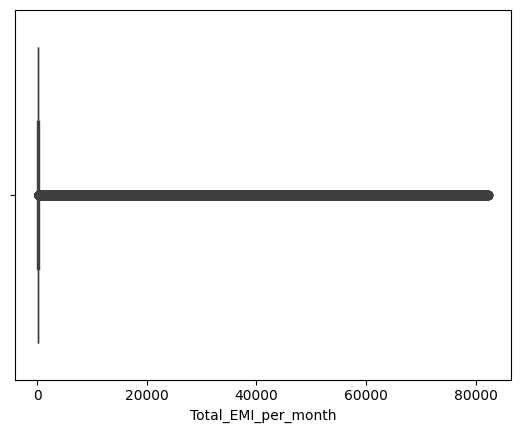

In [119]:
sns.boxplot(data= data, x = data['Total_EMI_per_month']);

In [120]:
#STRATEGY: nothing?

#### (14/15) Amount_invested_monthly:

In [121]:
data["Amount_invested_monthly"].value_counts(ascending=False)

Amount_invested_monthly
10000                 4305
0.0                    169
59.93725850034815        1
165.180659491917         1
62.030802602004044       1
                      ... 
109.296681189146         1
33.6098814431885         1
76.87001005130772        1
908.6939096189257        1
401.35900899207513       1
Name: count, Length: 91049, dtype: int64

In [122]:
# Convert Non-Numeric Values to NaN
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Amount_invested_monthly' within each group
mean_by_Customer_ID = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mean())

# Fill NaN values in 'Amount_invested_monthly' with the mean for each group
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(mean_by_Customer_ID)

# Converting potential negatives values in absolute
data.loc[data['Amount_invested_monthly']<0, 'Amount_invested_monthly'] = 0  # Replacing less than zero with zero

# Display the count of missing values
print(data['Amount_invested_monthly'].isna().sum())

0


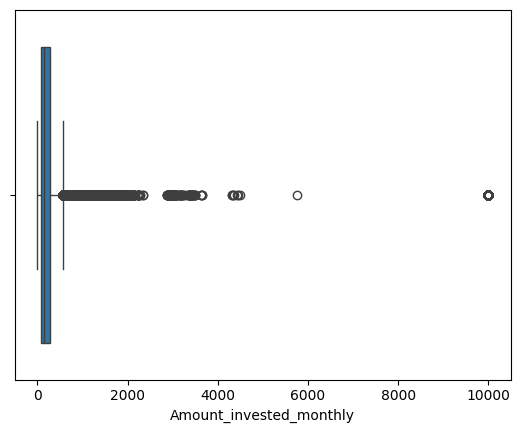

In [123]:
sns.boxplot(data=data, x=data['Amount_invested_monthly']);

#### (15/15) Monthly_Balance:

In [124]:
data["Monthly_Balance"].value_counts(ascending=False)

Monthly_Balance
-333333333333333333333333333    9
252.08489793906085              1
254.9709216273975               1
250.0931678204641               1
289.7550752754317               1
                               ..
278.8720257394474               1
376.7024623690405               1
321.2336043357731               1
373.29270287694055              1
336.6371802877606               1
Name: count, Length: 98792, dtype: int64

In [125]:
# Convert Non-Numeric Values to NaN
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Monthly_Balance' within each group
mean_by_Customer_ID = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mean())

# Fill NaN values in 'Monthly_Balance' with the mean for each group
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(mean_by_Customer_ID)

# Converting potential negatives values in absolute
data.loc[data['Monthly_Balance']<0, 'Monthly_Balance'] = 0  # Replacing less than zero with zero

# Display the count of missing values
print(data['Monthly_Balance'].isna().sum())

0


In [126]:
#STRATEGY: remove "_" and negative.

## Data Transformation

In [127]:
X = data.drop(columns=['Credit_Score'])
X.head()

,Customer_ID,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months
0,CUS0xd40,23.0,Scientist,19114.12,3.0,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,0.500000,8.660254e-01,265.000000
1,CUS0xd40,23.0,Scientist,19114.12,3.0,4,3,4,0,6.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,0.866025,5.000000e-01,268.333333
2,CUS0xd40,23.0,Scientist,19114.12,3.0,4,3,4,3,7.0,10.27,4.0,Good,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,1.000000,6.123234e-17,267.000000
3,CUS0xd40,23.0,Scientist,19114.12,3.0,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,0.866025,-5.000000e-01,268.000000
4,CUS0xd40,23.0,Scientist,19114.12,3.0,4,3,4,6,6.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,0.500000,-8.660254e-01,269.000000


In [128]:
numerical_features = X.select_dtypes(exclude=['object'])
numerical_features

,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months
0,23.0,3.0,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,5.000000e-01,8.660254e-01,265.000000
1,23.0,3.0,4,3,4,0,6.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,8.660254e-01,5.000000e-01,268.333333
2,23.0,3.0,4,3,4,3,7.0,10.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,1.000000e+00,6.123234e-17,267.000000
3,23.0,3.0,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,8.660254e-01,-5.000000e-01,268.000000
4,23.0,3.0,4,3,4,6,6.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,5.000000e-01,-8.660254e-01,269.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4.0,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228,8.660254e-01,-5.000000e-01,378.000000
99996,25.0,4.0,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610,5.000000e-01,-8.660254e-01,379.000000
99997,25.0,4.0,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083,1.224647e-16,-1.000000e+00,380.000000
99998,25.0,4.0,6,7,2,20,6.4,11.50,3.0,502.38,33.638208,35.104023,251.672582,319.164979,-5.000000e-01,-8.660254e-01,381.000000


#### Scaling numerical

In [129]:
# Instantiate the RobustScaler
robust_scaler = RobustScaler().set_output(transform='pandas')

# Pass the data (not the column name) to fit_transform
numerical_features_scaled = robust_scaler.fit_transform(numerical_features)

# Showing the scaled features
numerical_features_scaled

,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months
0,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196635,-0.333333,-0.258118,-0.649349,-0.150282,-0.292425,-0.111821,0.000000,1.378396e+00,0.291755
1,-0.555556,-0.75,-0.333333,-0.833333,0.25,-1.000000,-0.888889,0.196635,-0.333333,-0.258118,-0.042731,-0.150282,-0.101779,-0.251368,0.369340,1.009056e+00,0.312896
2,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.091483,-0.333333,-0.258118,-0.437753,-0.150282,-0.285959,-0.018093,0.504528,5.045279e-01,0.304440
3,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,-0.329127,-0.333333,-0.258118,-0.109890,-0.150282,0.306942,-0.557745,0.369340,3.360831e-16,0.310782
4,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.666667,-0.888889,0.196635,-0.333333,-0.258118,-0.889194,-0.150282,-0.488761,0.033386,0.000000,-3.693401e-01,0.317125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.277778,-0.777778,0.220820,-0.500000,-0.481035,0.279223,-0.260816,-0.390323,0.726376,0.369340,3.360831e-16,1.008457
99996,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.000000,-0.777778,0.220820,-0.500000,-0.481035,0.978180,-0.260816,-0.424487,0.810437,0.000000,-3.693401e-01,1.014799
99997,-0.444444,-0.50,0.333333,476.333333,-0.25,0.500000,-0.888889,0.220820,-0.500000,-0.481035,1.059881,-0.260816,-0.576326,0.911385,-0.504528,-5.045279e-01,1.021142
99998,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.111111,-0.844444,0.220820,-0.500000,-0.481035,0.157794,-0.260816,0.569836,-0.078413,-1.009056,-3.693401e-01,1.027484


#### Encoding categorical features

In [130]:
categorical_features = X.select_dtypes(include=['object'])
categorical_features

,Customer_ID,Occupation,Annual_Income,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,CUS0xd40,Scientist,19114.12,Good,No,HighspentSmallvaluepayments
1,CUS0xd40,Scientist,19114.12,Good,No,LowspentLargevaluepayments
2,CUS0xd40,Scientist,19114.12,Good,No,LowspentMediumvaluepayments
3,CUS0xd40,Scientist,19114.12,Good,No,LowspentSmallvaluepayments
4,CUS0xd40,Scientist,19114.12,Good,No,HighspentMediumvaluepayments
...,...,...,...,...,...,...
99995,CUS0x942c,Mechanic,39628.99,Good,No,HighspentLargevaluepayments
99996,CUS0x942c,Mechanic,39628.99,Good,No,HighspentMediumvaluepayments
99997,CUS0x942c,Mechanic,39628.99,Good,No,HighspentLargevaluepayments
99998,CUS0x942c,Mechanic,39628.99,Good,No,LowspentLargevaluepayments


In [131]:
# Instantiating the OHE
ohe = OneHotEncoder(drop="if_binary", sparse_output=False, min_frequency=0.05).set_output(transform='pandas')

# Fitting it to the categorical features
ohe.fit(categorical_features)

# Printing the different categories detected by the OHE
display(ohe.categories_)

# Since Sklearn 1.1, you can retrieve the names of the generated columns
display(ohe.get_feature_names_out())

# Storing the encoded features
encoded_features = ohe.transform(categorical_features)

[array(['CUS0x1000', 'CUS0x1009', 'CUS0x100b', ..., 'CUS0xff6', 'CUS0xffc',
        'CUS0xffd'], dtype=object),
 array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
        'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
        'MediaManager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
       dtype=object),
 array(['10001727.0', '10003.495', '10004.805', ..., '9999.42', '99990.78',
        '99995.22'], dtype=object),
 array(['Bad', 'Good', 'Standard'], dtype=object),
 array(['NM', 'No', 'Yes'], dtype=object),
 array(['HighspentLargevaluepayments', 'HighspentMediumvaluepayments',
        'HighspentSmallvaluepayments', 'LowspentLargevaluepayments',
        'LowspentMediumvaluepayments', 'LowspentSmallvaluepayments'],
       dtype=object)]

array(['Customer_ID_infrequent_sklearn', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic',
       'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Annual_Income_infrequent_sklearn', 'Credit_Mix_Bad',
       'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_HighspentLargevaluepayments',
       'Payment_Behaviour_HighspentMediumvaluepayments',
       'Payment_Behaviour_HighspentSmallvaluepayments',
       'Payment_Behaviour_LowspentLargevaluepayments',
       'Payment_Behaviour_LowspentMediumvaluepayments',
       'Payment_Behaviour_LowspentSmallvaluepayments'], dtype=object)

## Concatenating all the preprocessed features together

In [132]:
X_preprocessed = pd.concat([numerical_features_scaled, encoded_features], axis=1)
X_preprocessed

,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Customer_ID_infrequent_sklearn,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Annual_Income_infrequent_sklearn,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments
0,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196635,-0.333333,-0.258118,-0.649349,-0.150282,-0.292425,-0.111821,0.000000,1.378396e+00,0.291755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.555556,-0.75,-0.333333,-0.833333,0.25,-1.000000,-0.888889,0.196635,-0.333333,-0.258118,-0.042731,-0.150282,-0.101779,-0.251368,0.369340,1.009056e+00,0.312896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.091483,-0.333333,-0.258118,-0.437753,-0.150282,-0.285959,-0.018093,0.504528,5.045279e-01,0.304440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,-0.329127,-0.333333,-0.258118,-0.109890,-0.150282,0.306942,-0.557745,0.369340,3.360831e-16,0.310782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.666667,-0.888889,0.196635,-0.333333,-0.258118,-0.889194,-0.150282,-0.488761,0.033386,0.000000,-3.693401e-01,0.317125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.277778,-0.777778,0.220820,-0.500000,-0.481035,0.279223,-0.260816,-0.390323,0.726376,0.369340,3.360831e-16,1.008457,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.000000,-0.777778,0.220820,-0.500000,-0.481035,0.978180,-0.260816,-0.424487,0.810437,0.000000,-3.693401e-01,1.014799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99997,-0.444444,-0.50,0.333333,476.333333,-0.25,0.500000,-0.888889,0.220820,-0.500000,-0.481035,1.059881,-0.260816,-0.576326,0.911385,-0.504528,-5.045279e-01,1.021142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99998,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.111111,-0.844444,0.220820,-0.500000,-0.481035,0.157794,-0.260816,0.569836,-0.078413,-1.009056,-3.693401e-01,1.027484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Encoding the target

In [133]:
y = data["Credit_Score"]

In [134]:
# from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

pd.DataFrame({"target": y, "encoded_target": y_encoded}).sample(10)

,target,encoded_target
2905,Standard,2
40850,Poor,1
79900,Standard,2
34337,Poor,1
54958,Standard,2
22550,Standard,2
73549,Standard,2
6475,Standard,2
45777,Standard,2
56559,Poor,1


In [135]:
df_preprocessed = pd.concat([X_preprocessed, pd.DataFrame({'Credit_Score': y_encoded})], axis=1)
df_preprocessed

,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Customer_ID_infrequent_sklearn,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Annual_Income_infrequent_sklearn,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196635,-0.333333,-0.258118,-0.649349,-0.150282,-0.292425,-0.111821,0.000000,1.378396e+00,0.291755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.75,-0.333333,-0.833333,0.25,-1.000000,-0.888889,0.196635,-0.333333,-0.258118,-0.042731,-0.150282,-0.101779,-0.251368,0.369340,1.009056e+00,0.312896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.091483,-0.333333,-0.258118,-0.437753,-0.150282,-0.285959,-0.018093,0.504528,5.045279e-01,0.304440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,-0.329127,-0.333333,-0.258118,-0.109890,-0.150282,0.306942,-0.557745,0.369340,3.360831e-16,0.310782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.666667,-0.888889,0.196635,-0.333333,-0.258118,-0.889194,-0.150282,-0.488761,0.033386,0.000000,-3.693401e-01,0.317125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.277778,-0.777778,0.220820,-0.500000,-0.481035,0.279223,-0.260816,-0.390323,0.726376,0.369340,3.360831e-16,1.008457,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
99996,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.000000,-0.777778,0.220820,-0.500000,-0.481035,0.978180,-0.260816,-0.424487,0.810437,0.000000,-3.693401e-01,1.014799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
99997,-0.444444,-0.50,0.333333,476.333333,-0.25,0.500000,-0.888889,0.220820,-0.500000,-0.481035,1.059881,-0.260816,-0.576326,0.911385,-0.504528,-5.045279e-01,1.021142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
99998,-0.444444,-0.50,0.333333,-0.500000,-0.25,0.111111,-0.844444,0.220820,-0.500000,-0.481035,0.157794,-0.260816,0.569836,-0.078413,-1.009056,-3.693401e-01,1.027484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


## Export

In [137]:
# Export
df_preprocessed.to_csv('/home/fernando_cir/code/monrosegregory/credit_score/raw_data/df_cirone-preprocessed.csv', index=False)

## End ;)